# ObsID : 0945040134, SRCNUM : 56, Instru : EPN
Not on Simbad.

## ESASky

https://sky.esa.int/esasky/?target=54.213208333333334%20-28.330666666666666&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033651.5-2819524
- IAU name : XMM J033651.5-281952
- RA : 03h 36m 51.547s
- DEC : -28° 19' 52.59"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [16]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

Fit statistic  : Chi-Squared                  5.6594     using 6 bins.

Test statistic : Chi-Squared                  5.6594     using 6 bins.
 Null hypothesis probability of 1.2941e-01 with 3 degrees of freedom
 Current data and model not fit yet.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [17]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040134_SRCNUM56_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.254e-03 +/- 2.183e-03 (25.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-9
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.146e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945040134_SRCNUM56_EPN_background_spectrum.fits
  Background Exposure Time: 1.146e+04 sec
 Using Response (RMF) File            ObsID0945040134_SRCNUM56_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040134_SRCNUM56_EPN.arf


Fit statistic  : Chi-Squared                  6.5501     using 9 bins.

Test statistic : Chi-Squared                  6.5501     using 9 bins.
 Null hypothesis probability of 3.6446e-01 with 6 degrees of freedom
 Current data and model not fit yet.


In [4]:
n_cts = 5.254e-03*1.146e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 60.21084

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     2 channels (1-2) ignored in spectrum #     1
     1 channels (9) ignored in spectrum #     1



(-0.5, 854.5, 659.5, -0.5)

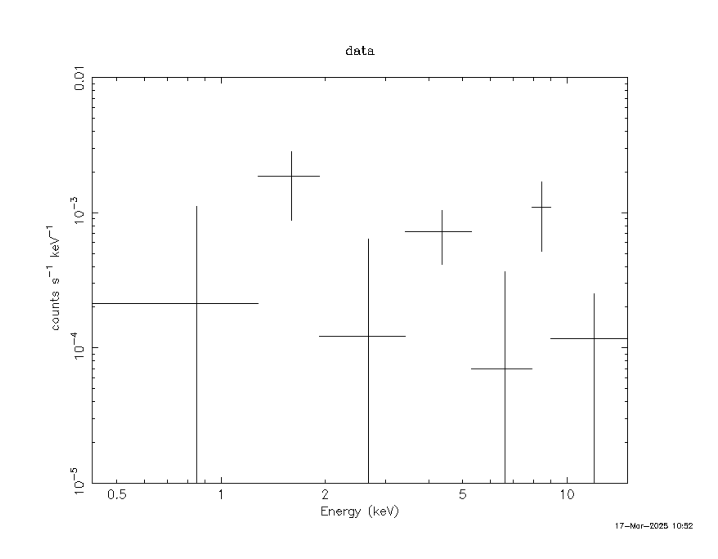

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model (Second best fit)

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.602519e+11     using 6 bins.

Tes

(-0.5, 857.5, 656.5, -0.5)

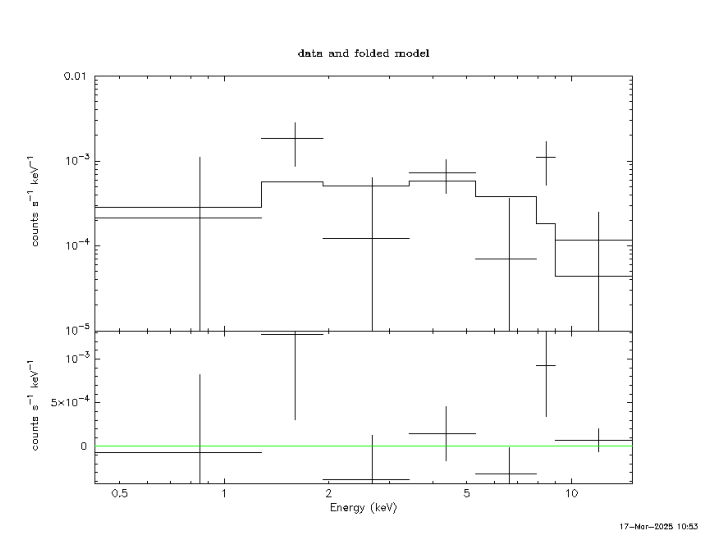

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.618407e+09     using 6 bins.

Test statistic : Chi-Squared              8.618407e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.712        0.0652606     0       1.03419       11.1773   2.50759e-05
6.51688      3024.84       0      0.968981       27.0128   2.49945e-05
6.45236      7922.15      -1      0.609176       195.948   3.44304e-05
6.4

(-0.5, 856.5, 659.5, -0.5)

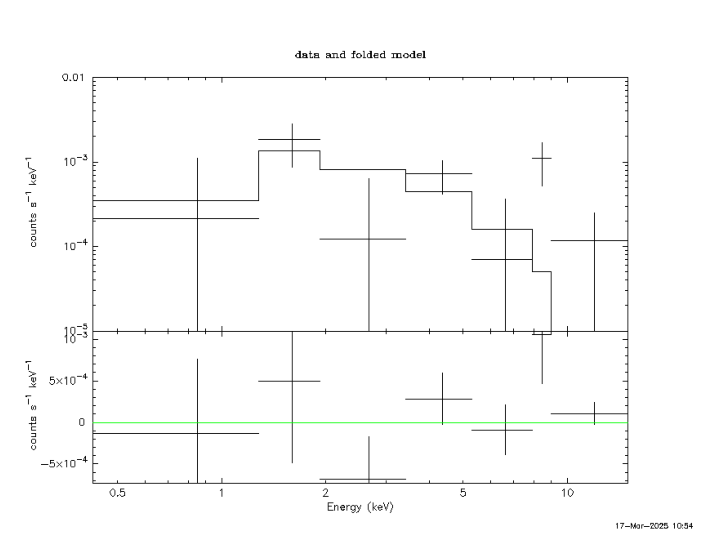

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.166560e+09     using 6 bins.

Test statistic : Chi-Squared              2.166560e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
9.37658      0.67873      -1       1.04833       2.17629   3.4

(-0.5, 860.5, 659.5, -0.5)

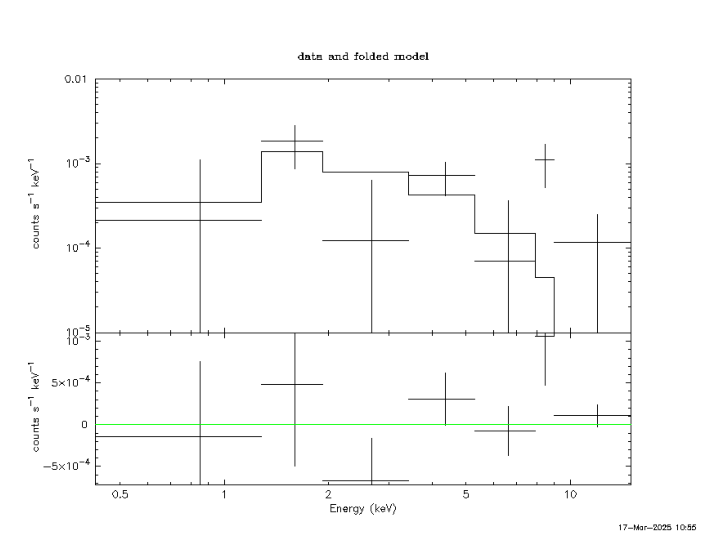

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model (Third best fit)

In [8]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.560990e+10     using 6 bins.

Test statistic : Chi-Squared              4.560990e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
5.87481      0.103721     -2      0.439086      0.140686   4.54571e-06
5.7465       89481.2      -2     0.0947800     0.0472241   3.07677e-06
5.66956      22595.5      -3      0.332280      0.205678   4.05488e-06
5

(-0.5, 856.5, 657.5, -0.5)

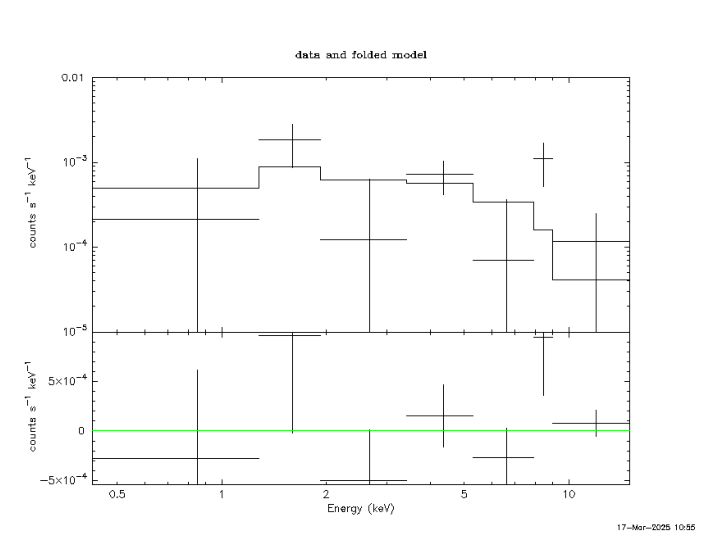

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model (Second best fit)

In [22]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.595000e+11     using 9 bins.

Test statistic : Chi-Squared              3.595000e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
6.76539      6773.98    

(-0.5, 851.5, 661.5, -0.5)

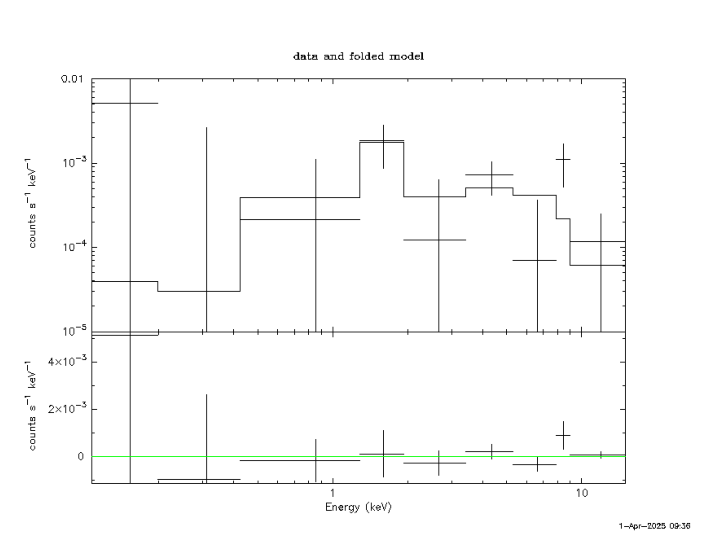

In [23]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model (Best fit)

In [24]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.226234e+10     using 9 bins.

Test statistic : Chi-Squared              9.226234e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
7.22757      2877.92   

(-0.5, 854.5, 660.5, -0.5)

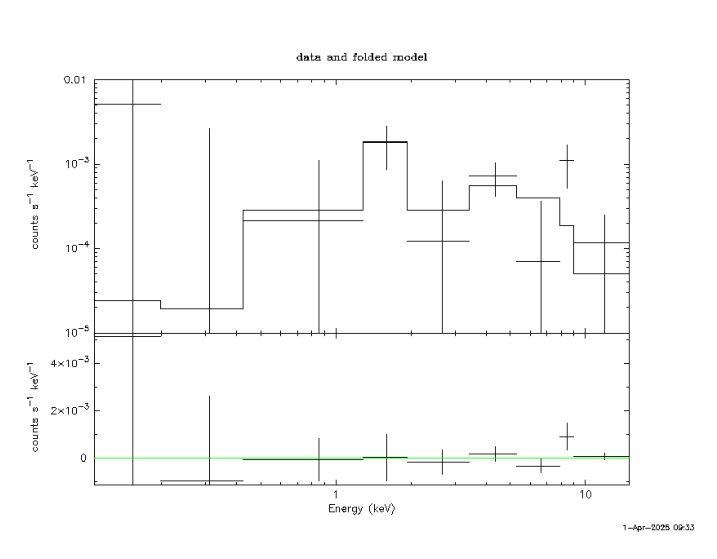

In [21]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 54.2147805°
- Dec: -28.3312739°

54.21 -28.33

**Column density :** nH = 1*10^20 cm^-2

In [25]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Third best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 5.9309311006620584e+16

bremss
(tbabs) : 9.451957647773253e+21

apec
(tbabs) : 9.556619032555147e+21

powerlaw (Third best fit)
(tbabs) : 2.5289059797597023e+21

bbody+powerlaw (Second best fit)
(tbabs) : 3.758567456391212e+22

bremss+powerlaw (Best fit)
(tbabs) : 6.03384063617913e+22


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss + Powerlaw`` with Chi-squared = 4.8316 using 6 bins: **4.5735e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Black body + Powerlaw`` with Chi-squared = 5.1298 using 6 bins: **5.2381e-13 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Powerlaw`` with Chi-squared = 5.9087 using 6 bins: **3.2721e-13 ergs/cm^2/s**.

In [3]:
Flux_bp = 4.5735e-13 # ergs/cm^2/s
Flux_bbp = 5.2381e-13 # ergs/cm^2/s
Flux_pow = 3.2721e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 4.5735e-13 ergs/cm^2/s
Black body + Powerlaw : F_x-ray = 4.5735e-13 ergs/cm^2/s
Powerlaw : F_x-ray = 3.2721e-13 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [4]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [5]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bbp/F}")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw : F_x-ray/F_optical = 8.2996424700999
Black body + Powerlaw : F_x-ray/F_optical = 9.505708368345969
Powerlaw : F_x-ray/F_optical = 5.937960014521458


## Luminosity
No distance or parallax data is available on ESASky.

In [4]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s
L1_bbp = 4*np.pi*Flux_bbp*(d1_cm)**2 # erg/s
L2_bbp = 4*np.pi*Flux_bbp*(d2_cm)**2 # erg/s
L1_pow = 4*np.pi*Flux_pow*(d1_cm)**2 # erg/s
L2_pow = 4*np.pi*Flux_pow*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of a galactic source with d = [1 pc - 30 kpc] :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Black body + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Powerlaw : L_x-ray = [{L1_pow}, {L2_pow}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s
L1_bbp = 4*np.pi*Flux_bbp*(d1_cm)**2 # erg/s
L2_bbp = 4*np.pi*Flux_bbp*(d2_cm)**2 # erg/s
L1_pow = 4*np.pi*Flux_pow*(d1_cm)**2 # erg/s
L2_pow = 4*np.pi*Flux_pow*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Black body + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Powerlaw : L_x-ray = [{L1_pow}, {L2_pow}] erg/s")

Luminosity of a galactic source with d = [1 pc - 30 kpc] :
Bremss + Powerlaw : L_x-ray = [5.4722502335188275e+25, 5.472250233518827e+31] erg/s
Black body + Powerlaw : L_x-ray = [5.4722502335188275e+25, 5.472250233518827e+31] erg/s
Powerlaw : L_x-ray = [3.915108776450629e+25, 3.915108776450629e+31] erg/s

Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :
Bremss + Powerlaw : L_x-ray = [5.472250233518827e+37, 5.4722502335188275e+45] erg/s
Black body + Powerlaw : L_x-ray = [5.472250233518827e+37, 5.4722502335188275e+45] erg/s
Powerlaw : L_x-ray = [3.9151087764506295e+37, 3.9151087764506295e+45] erg/s


In [ ]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
L_bbp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
L_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_bp,D_pc, lw=1, color='firebrick', label="Bremss + Powerlaw")
plt.plot(L_bbp,D_pc, lw=1, color='palevioletred', label="Black body + Powerlaw")
plt.plot(L_pow,D_pc, lw=1, color='steelblue', label="Powerlaw")
plt.legend(loc='best')
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()